In [17]:
cd /Volumes/GalagaResearch/Developer/masers/W51/FITS/

/Volumes/GalagaResearch/Developer/masers/W51/FITS


In [18]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u
import pandas as pd

In [19]:
#Accessing Cube Data
def fit_2dgaussian(directory, maser_table, line, spw, channel, amplitude, x, y, x_stddev, y_stddev, theta=np.pi/3, size=13, table=True):

    cube = SpectralCube.read(directory, format='fits')
    cube = cube[channel,:,:]

    cube_cutout = cube[y - size:y + size, x - size:x + size]
    yy, xx = cube_cutout.spatial_coordinate_map

    cord = cube.world[y,x]

    p_init_gauss2D = models.Gaussian2D(x_mean=cord[1], y_mean=cord[0], amplitude=amplitude * (u.Jy/u.beam),
                                    x_stddev=(x_stddev) * u.arcsec, y_stddev=(y_stddev) * u.arcsec, theta=(theta)*u.rad)

    fit_p = fitting.LevMarLSQFitter()

    cube_cutout_quant = cube_cutout

    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)

    p_init_gauss2D.theta.fixed = True

    cov = np.diag(fit_p.fit_info['param_cov'])
    errors = np.sqrt(cov)

    amplitude_error=np.format_float_scientific(errors[0],precision=9)
    x_mean_error=np.format_float_scientific(errors[1],precision=9)
    y_mean_error=np.format_float_scientific(errors[2],precision=9)
    x_stddev_error=np.format_float_scientific(errors[3],precision=9)
    y_stddev_error=np.format_float_scientific(errors[4],precision=9)
    theta_error=np.format_float_scientific(errors[5],precision=9)

    amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
    x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
    y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
    x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
    y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
    theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)

                
    plt.figure(figsize=(20, 6))
    plt.suptitle(f"W51IRS2 spw-{spw} channel-{channel} line-{line}", fontsize=18)

    plt.subplot(1, 3, 1)
    plt.title("Image")
    plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
    plt.colorbar()

    plt.subplot(1, 3, 2)
    plt.title("Model")
    plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
    plt.colorbar()

    plt.subplot(1, 3, 3)
    plt.title("Residual")
    plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
    plt.colorbar(label='S (Jy)')

    plt.show()

    #saveplotfig_gaussianfit()

    # print("Parameter" + ' ' + 'Error' +"\n")
    # print(amplitude + ' ' + amplitude_error +"\n")
    # print(x_mean + ' ' + x_mean_error +"\n")
    # print(y_mean + ' ' + y_mean_error +"\n")
    # print(x_stddev + ' ' + x_stddev_error +"\n")
    # print(y_stddev + ' ' + y_stddev_error +"\n")
    # print(theta + ' ' + theta_error +"\n")
    
    if table:
        new_row = pd.DataFrame({'line': [str(line)], 'spw': [spw], 'channel': [channel], 'x_pix': [x], 'y_pix': [y], 'amplitude': [amplitude], 'amplitude_error': [amplitude_error], 'x_mean': [x_mean], 'x_mean_error': [x_mean_error], 'y_mean': [y_mean], 'y_mean_error': [y_mean_error]})
        maser_table = pd.concat([maser_table, new_row], ignore_index=True)

        return maser_table

In [20]:
w51_irs2_maser_positions = pd.DataFrame(columns=['line', 'spw', 'channel', 'x_pix', 'y_pix', 'amplitude', 'amplitude_error', 'x_mean', 'x_mean_error', 'y_mean', 'y_mean_error'])

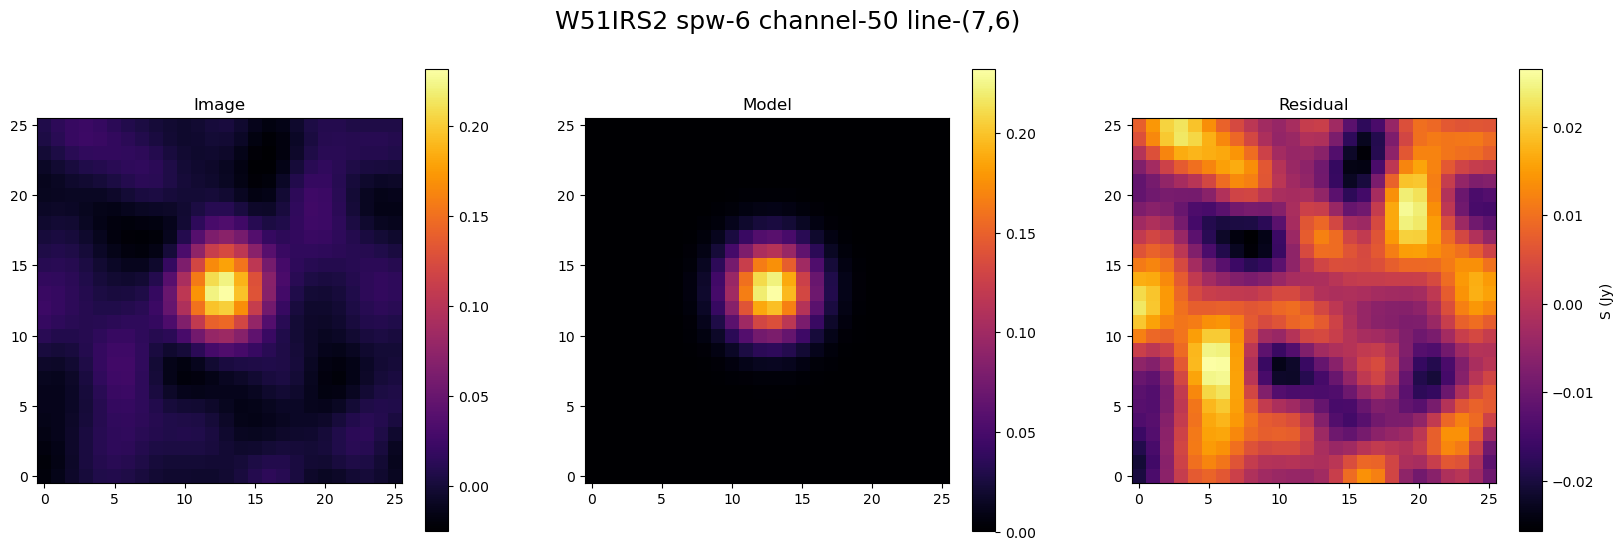

In [ ]:
w51_irs2_maser_positions = fit_2dgaussian(table=True, directory='/W51North_spw_6_corrected11_1_aug_02_ICRS.fits', 
                                          maser_table=w51_irs2_maser_positions, spw=6, channel=50, 
                                          amplitude=2.3e-1, x=144, y=215, x_stddev=0.028, y_stddev=0.029, theta=np.pi/3, 
                                          size=13, line='(7,6)')

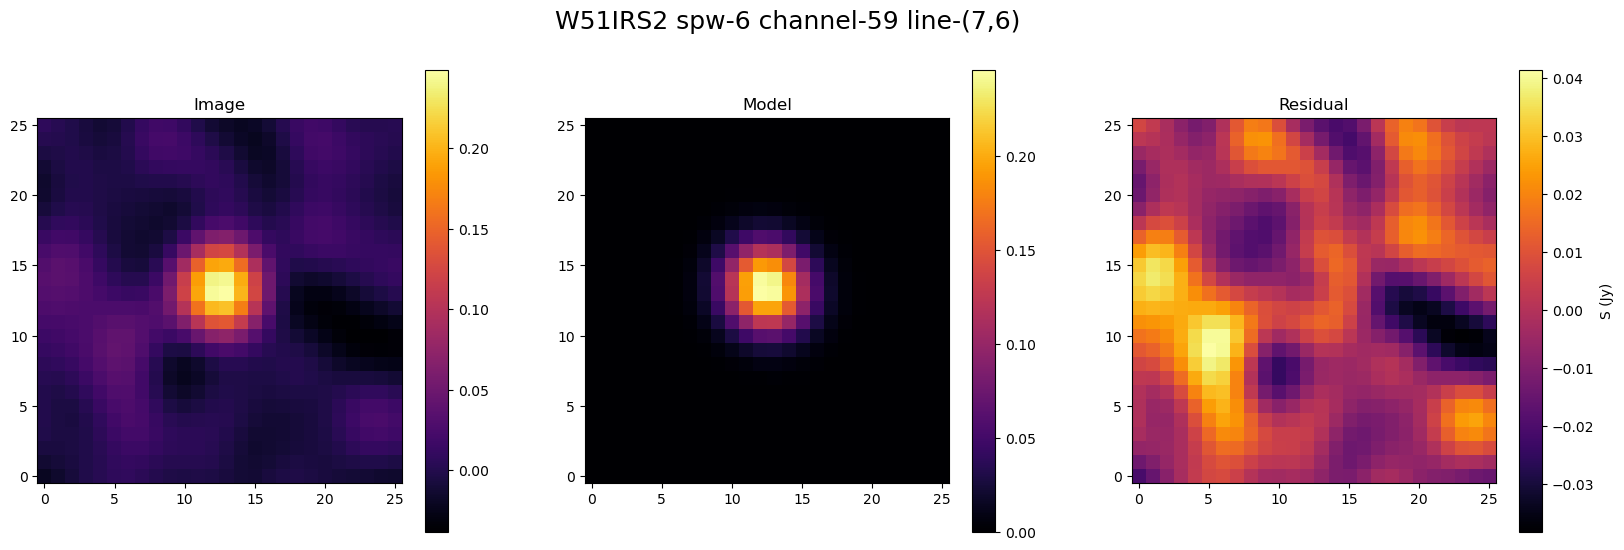

In [11]:
w51_irs2_maser_positions = fit_2dgaussian(table=True, directory='W51North_spw_6_corrected11_1_aug_02_ICRS.fits', 
                                          maser_table=w51_irs2_maser_positions, spw=6, channel=59, 
                                          amplitude=2.3e-1, x=144, y=215, x_stddev=0.028, y_stddev=0.029, theta=np.pi/3, 
                                          size=13, line='(7,6)')

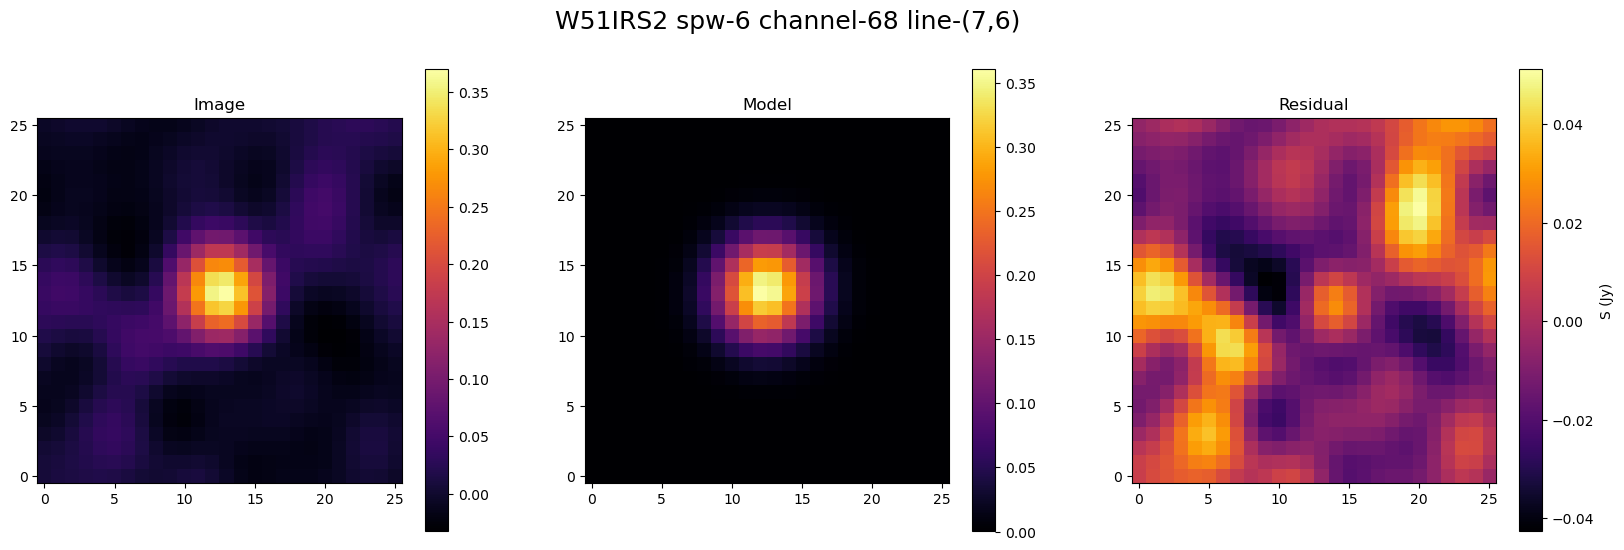

In [12]:
w51_irs2_maser_positions = fit_2dgaussian(table=True, directory='W51North_spw_6_corrected11_1_aug_02_ICRS.fits', 
                                          maser_table=w51_irs2_maser_positions, spw=6, channel=68, 
                                          amplitude=2.3e-1, x=144, y=215, x_stddev=0.028, y_stddev=0.029, theta=np.pi/3, 
                                          size=13, line='(7,6)')

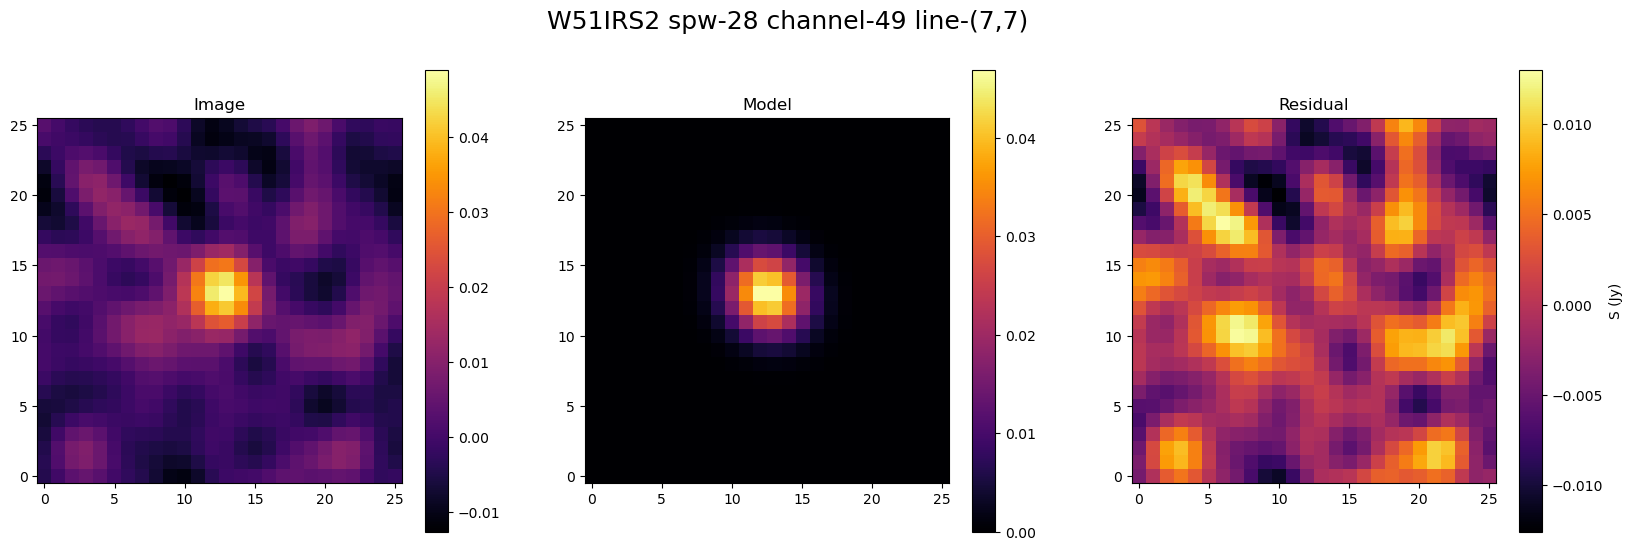

In [13]:
w51_irs2_maser_positions = fit_2dgaussian(table=True, directory='W51North_spw_28_corrected31_aug_02_ICRS.fits', 
                                          maser_table=w51_irs2_maser_positions, spw=28, channel=49, 
                                          amplitude=4.9e-2, x=144, y=215, x_stddev=0.028, y_stddev=0.029, theta=np.pi/3, 
                                          size=13, line='(7,7)')

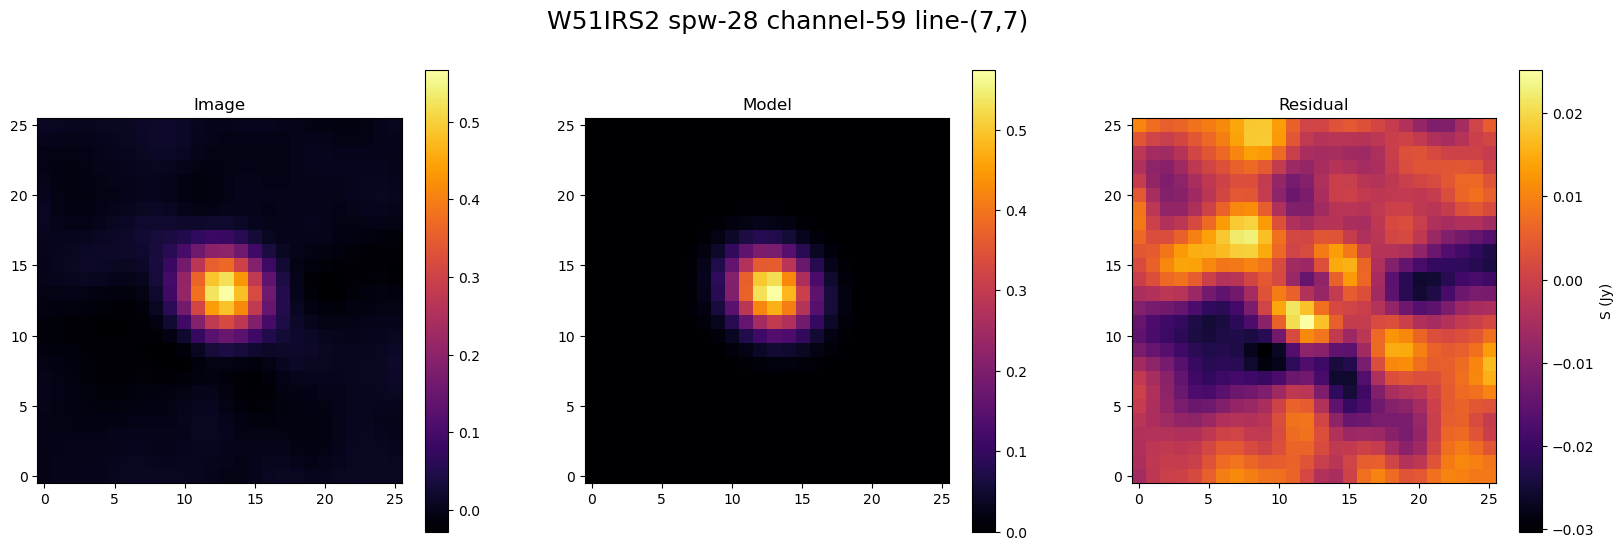

In [14]:
w51_irs2_maser_positions = fit_2dgaussian(table=True, directory='W51North_spw_28_corrected31_aug_02_ICRS.fits', 
                                          maser_table=w51_irs2_maser_positions, spw=28, channel=59, 
                                          amplitude=5.7e-1, x=144, y=215, x_stddev=0.028, y_stddev=0.030, theta=2*np.pi/3, 
                                          size=13,line='(7,7)')

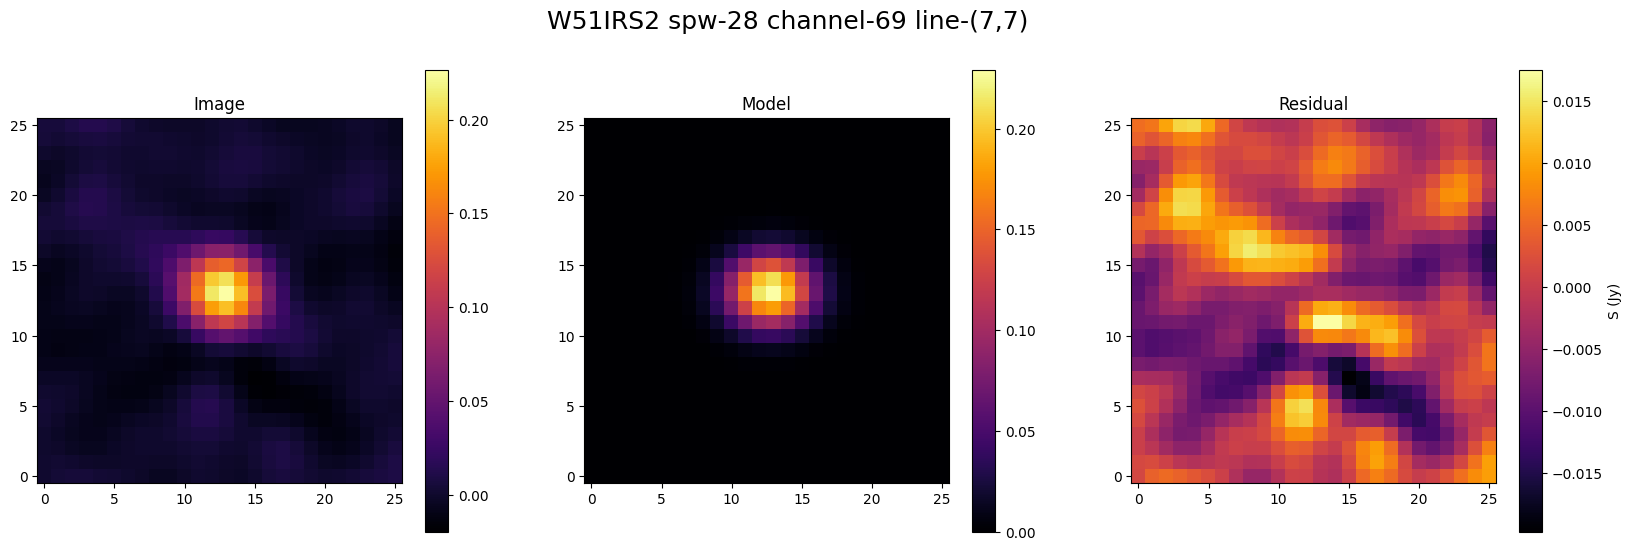

In [33]:
w51_irs2_maser_positions = fit_2dgaussian(table=True, directory='W51North_spw_28_corrected31_aug_02_ICRS.fits', 
                                          maser_table=w51_irs2_maser_positions, spw=28, channel=69, 
                                          amplitude=2.3e-1, x=144, y=215, x_stddev=0.028, y_stddev=0.030, theta=2*np.pi/3, 
                                          size=13, line='(7,7)')

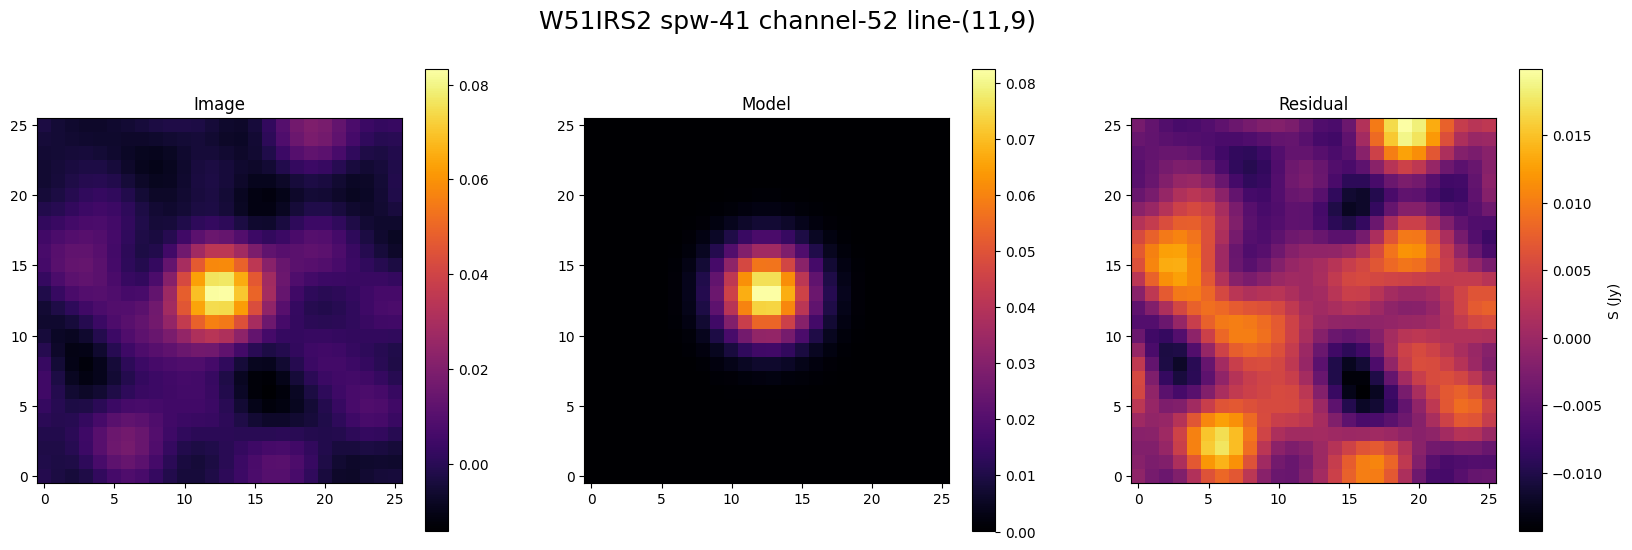

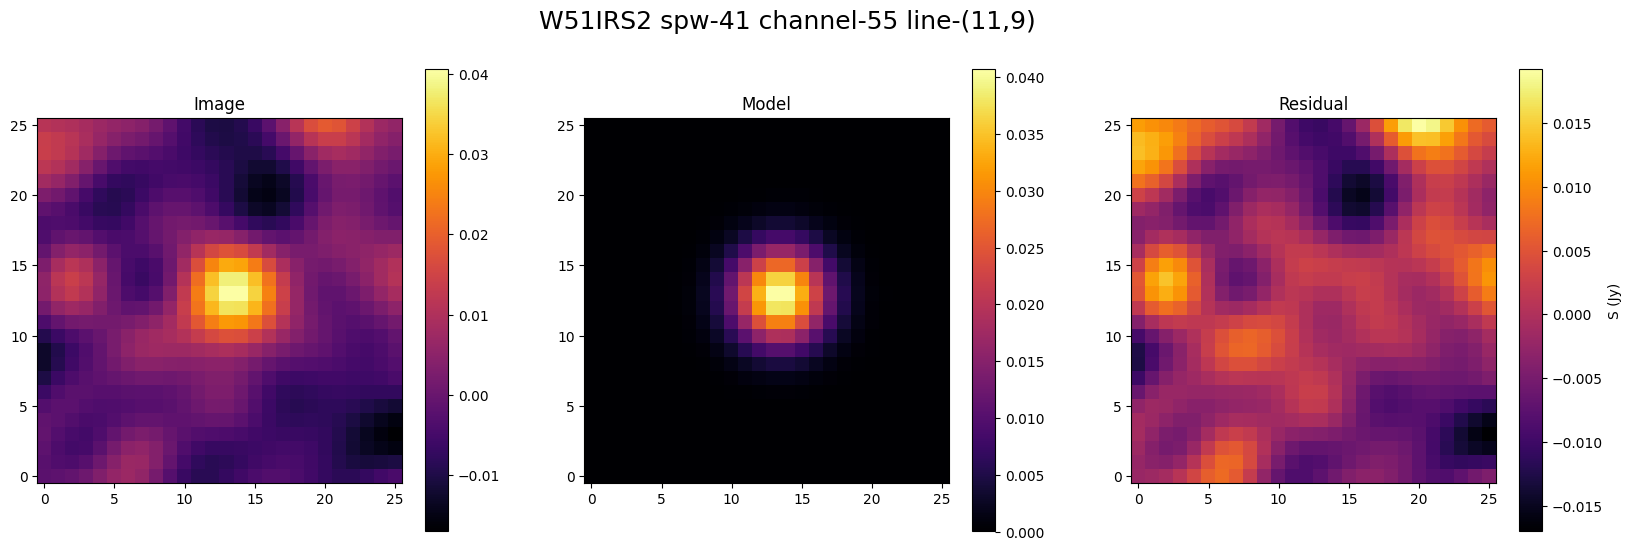

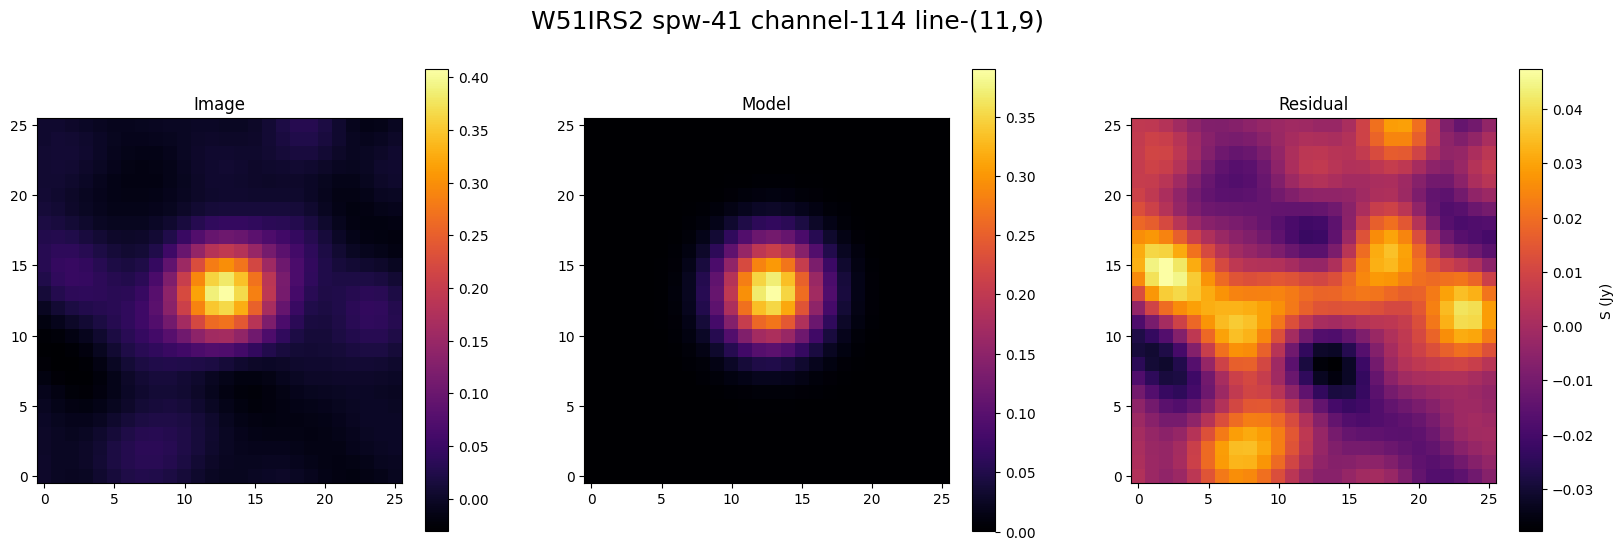

In [34]:
w51_irs2_maser_positions = fit_2dgaussian(table=True, directory='W51North_spw_41_corrected2_aug_02_ICRS.fits', 
                                          maser_table=w51_irs2_maser_positions, spw=41, channel=52, 
                                          amplitude=8.32e-2, x=407, y=413, x_stddev=0.028, y_stddev=0.030, theta=2*np.pi/3, 
                                          size=13, line='(11,9)')

w51_irs2_maser_positions = fit_2dgaussian(table=True, directory='W51North_spw_41_corrected2_aug_02_ICRS.fits', 
                                          maser_table=w51_irs2_maser_positions, spw=41, channel=55, 
                                          amplitude=4.05e-2, x=365, y=397, x_stddev=0.028, y_stddev=0.030, theta=2*np.pi/3, 
                                          size=13, line='(11,9)')

w51_irs2_maser_positions = fit_2dgaussian(table=True, directory='W51North_spw_41_corrected2_aug_02_ICRS.fits', 
                                          maser_table=w51_irs2_maser_positions, spw=41, channel=114, 
                                          amplitude=4.1e-1, x=344, y=415, x_stddev=0.028, y_stddev=0.030, theta=2*np.pi/3, 
                                          size=13, line='(11,9)')

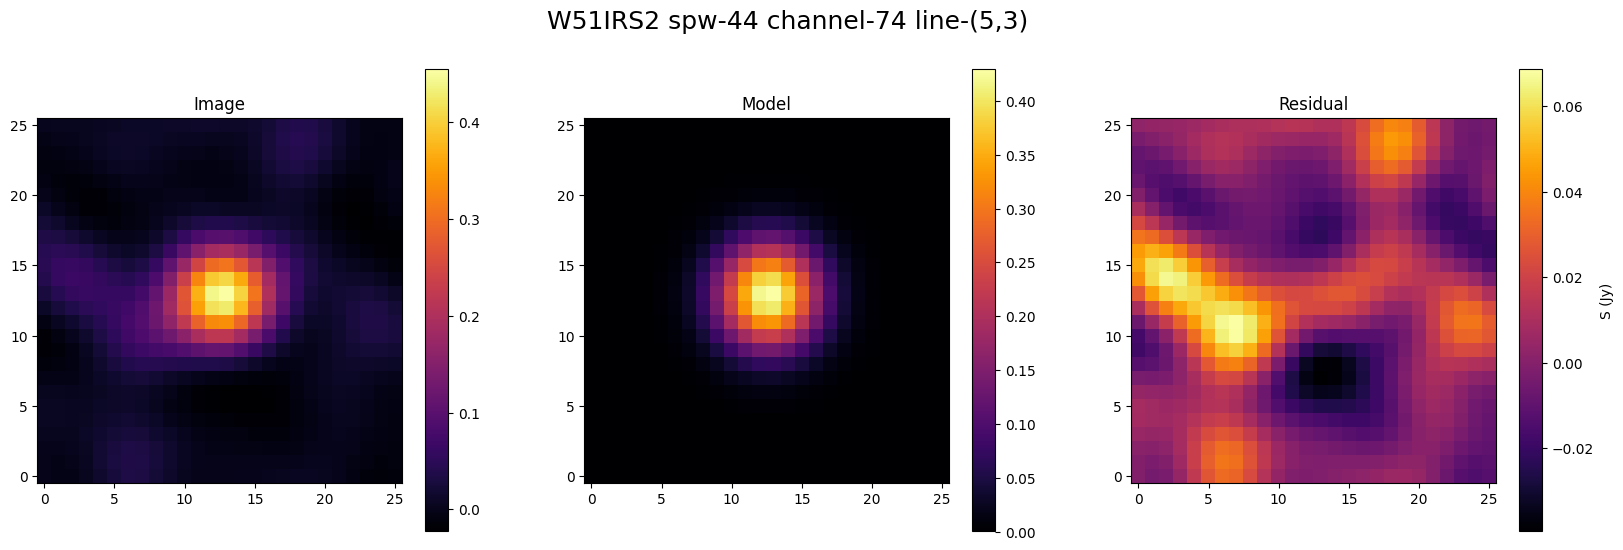

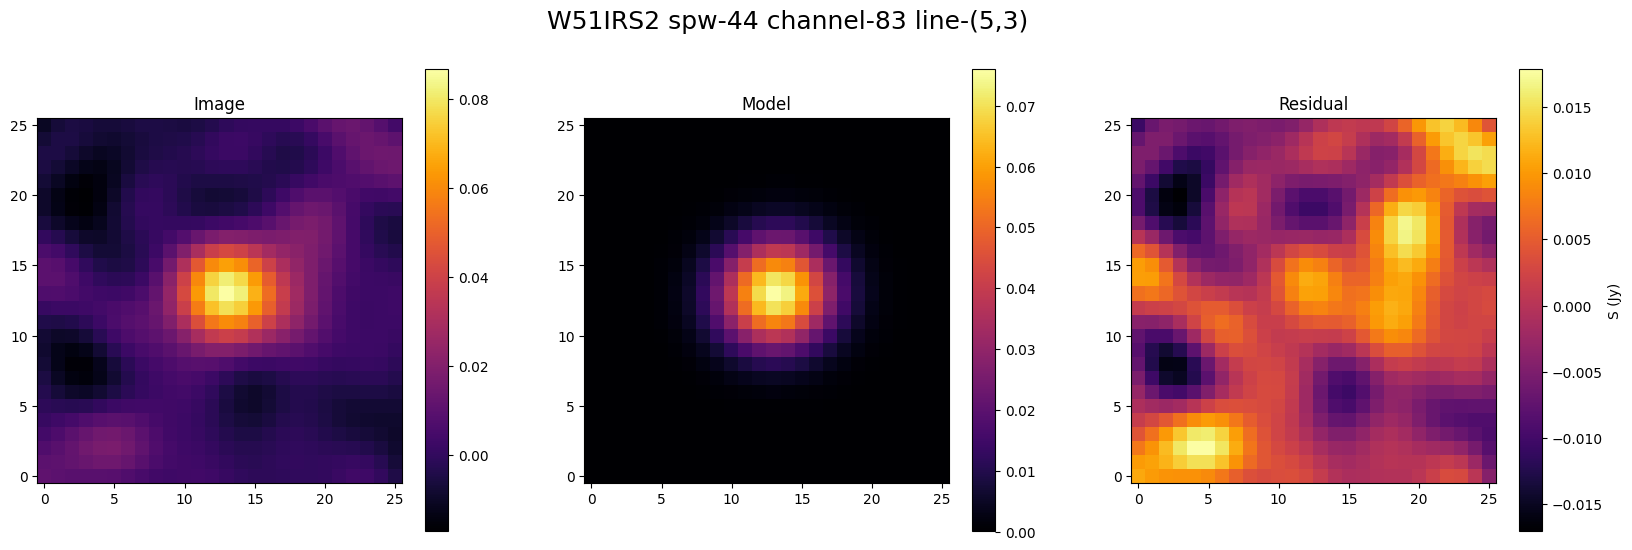

In [35]:
w51_irs2_maser_positions = fit_2dgaussian(table=True, directory='W51North_spw_44_corrected2_aug_02_ICRS.fits', 
                                          maser_table=w51_irs2_maser_positions, spw=44, channel=74, 
                                          amplitude=4.54e-1, x=638, y=356, x_stddev=0.028, y_stddev=0.030, theta=2*np.pi/3, 
                                          size=13, line='(5,3)')

w51_irs2_maser_positions = fit_2dgaussian(table=True, directory='W51North_spw_44_corrected2_aug_02_ICRS.fits', 
                                          maser_table=w51_irs2_maser_positions, spw=44, channel=83, 
                                          amplitude=8.66e-2, x=630, y=358, x_stddev=0.024, y_stddev=0.028, theta=2*np.pi/3, 
                                          size=13, line='(5,3)')

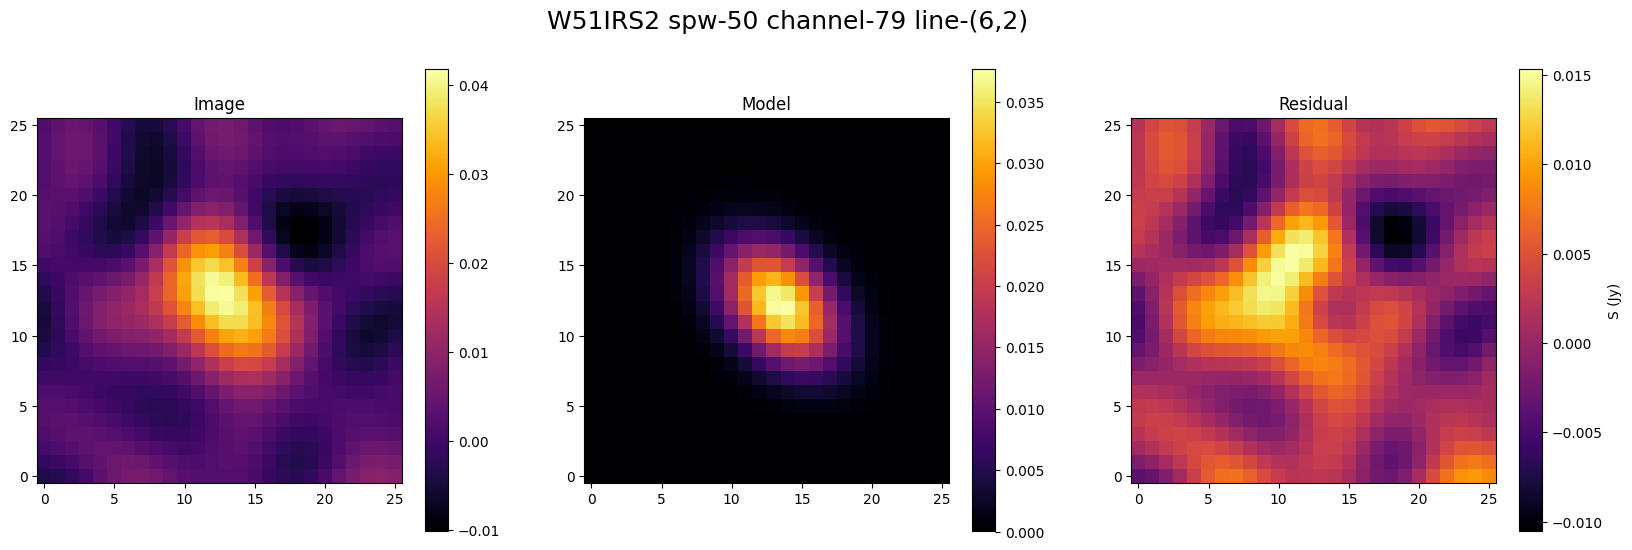

In [36]:
w51_irs2_maser_positions = fit_2dgaussian(table=True, directory='W51North_spw_50_corrected2_aug_02_ICRS.fits', 
                                          maser_table=w51_irs2_maser_positions, spw=50, channel=79, 
                                          amplitude=4.17e-2, x=637, y=359, x_stddev=0.09, y_stddev=0.021, theta=1*np.pi/4, 
                                          size=13, line='(6,2)')

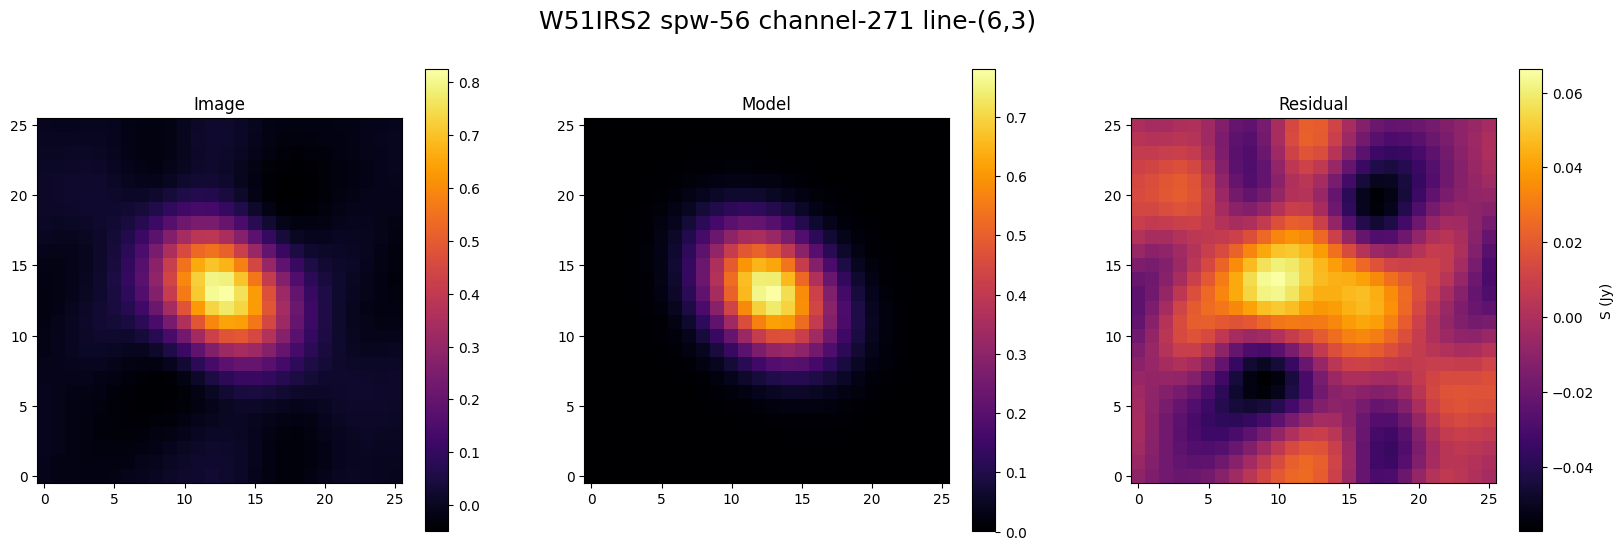

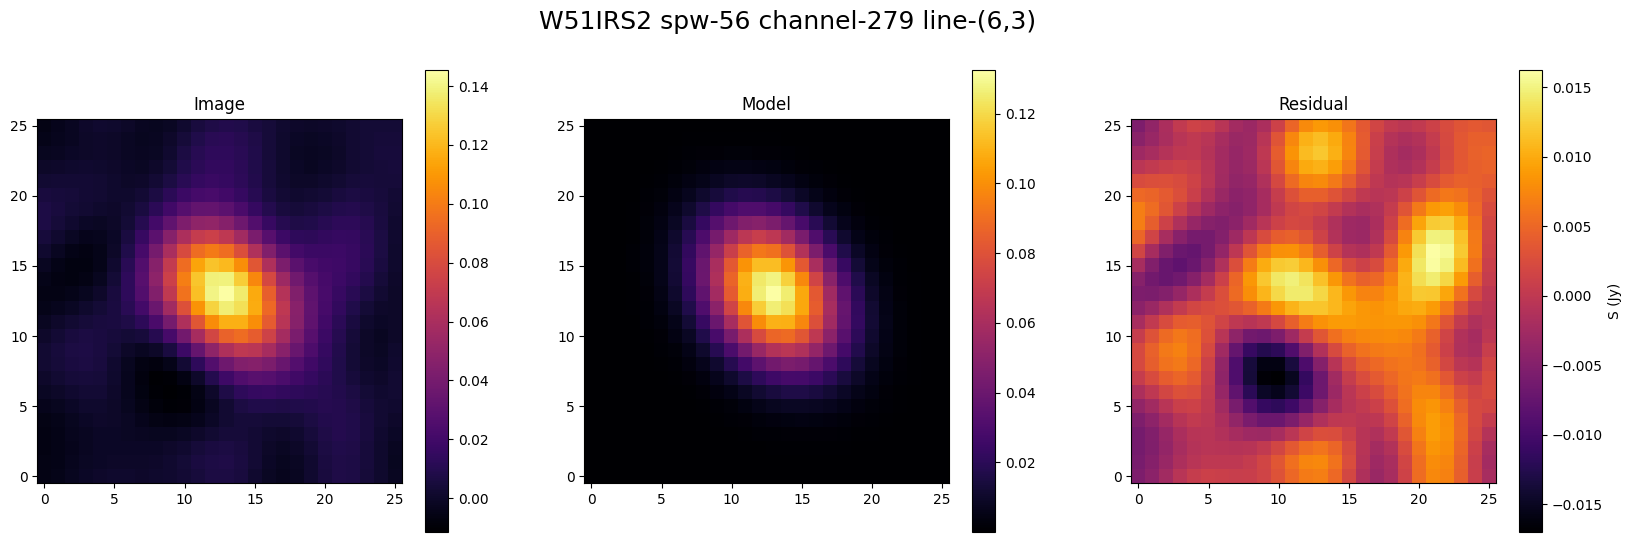

In [37]:
w51_irs2_maser_positions = fit_2dgaussian(table=True, directory='W51North_spw_56_corrected_40_aug_02.fits', 
                                          maser_table=w51_irs2_maser_positions, spw=56, channel=271, 
                                          amplitude=9.3e-1, x=638, y=356, x_stddev=0.03, y_stddev=0.038, theta=2.5*np.pi/4, 
                                          size=13, line='(6,3)')

w51_irs2_maser_positions = fit_2dgaussian(table=True, directory='W51North_spw_56_corrected_40_aug_02.fits', 
                                          maser_table=w51_irs2_maser_positions, spw=56, channel=279, 
                                          amplitude=1.45e-1, x=630, y=358, x_stddev=0.03, y_stddev=0.038, theta=2.5*np.pi/4, 
                                          size=13, line='(6,3)')


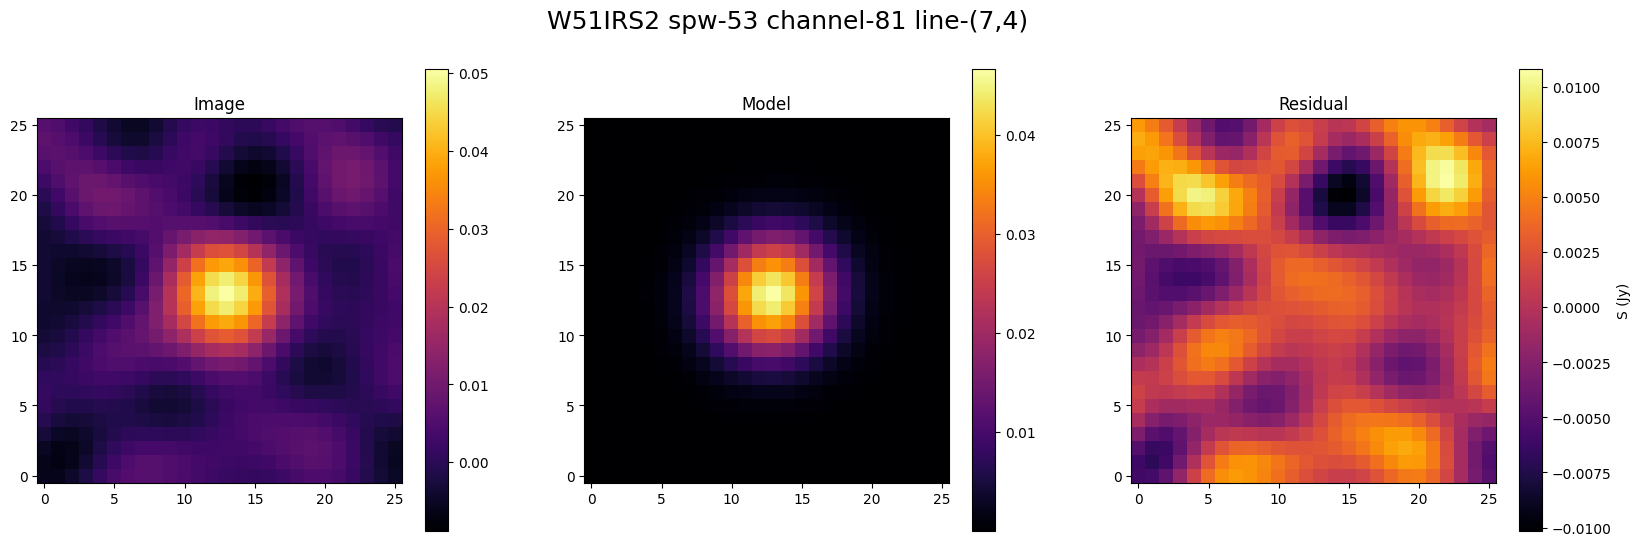

In [38]:
w51_irs2_maser_positions = fit_2dgaussian(table=True, directory='W51North_spw_53_corrected2_aug_02_ICRS.fits', 
                                          maser_table=w51_irs2_maser_positions, spw=53, channel=81, 
                                          amplitude=5.05e-2, x=637, y=358, x_stddev=0.028, y_stddev=0.030, theta=2*np.pi/3, 
                                          size=13, line='(7,4)')

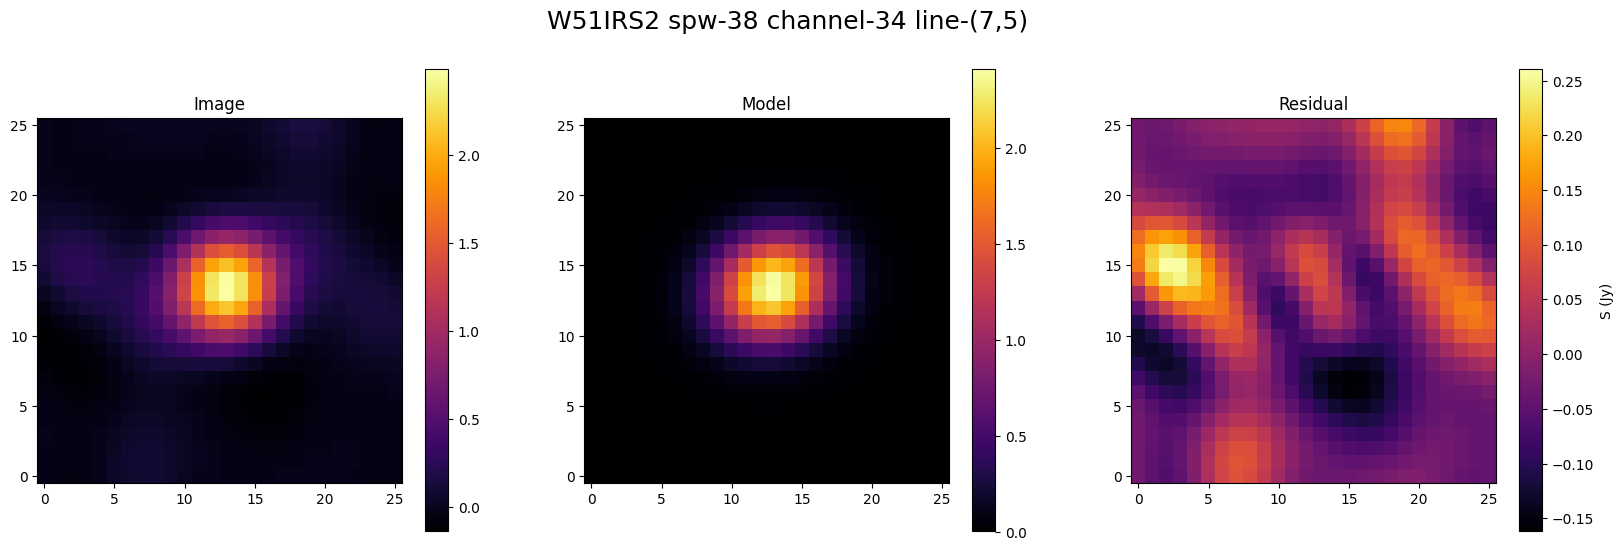

In [39]:
w51_irs2_maser_positions = fit_2dgaussian(table=True, directory='W51North_spw_38_corrected6_aug_02_ICRS.fits', 
                                          maser_table=w51_irs2_maser_positions, spw=38, channel=34, 
                                          amplitude=5.05e-2, x=637, y=358, x_stddev=0.025, y_stddev=0.025, theta=4*np.pi/3, 
                                          size=13, line='(7,5)')

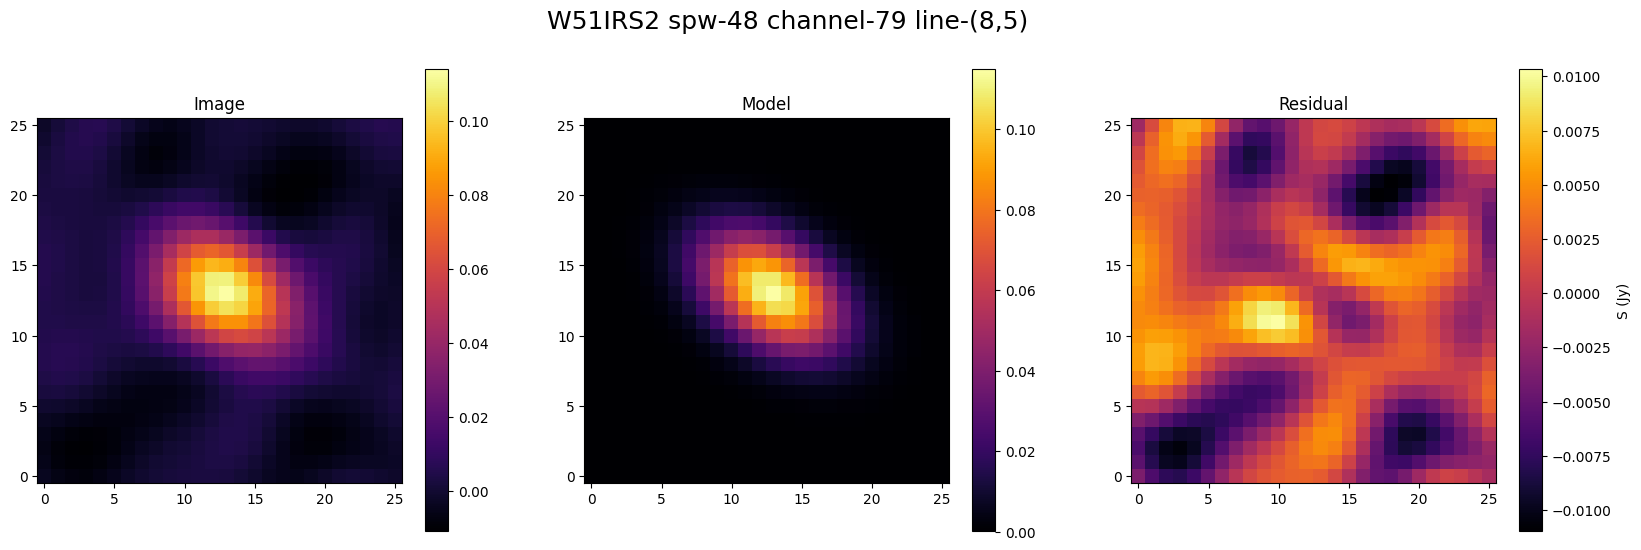

In [40]:
w51_irs2_maser_positions = fit_2dgaussian(table=True, directory='W51North_spw_48_corrected2_aug_02_ICRS.fits', 
                                          maser_table=w51_irs2_maser_positions, spw=48, channel=79, 
                                          amplitude=5.05e-2, x=637, y=358, x_stddev=0.025, y_stddev=0.025, theta=4*np.pi/3, 
                                          size=13, line='(8,5)')

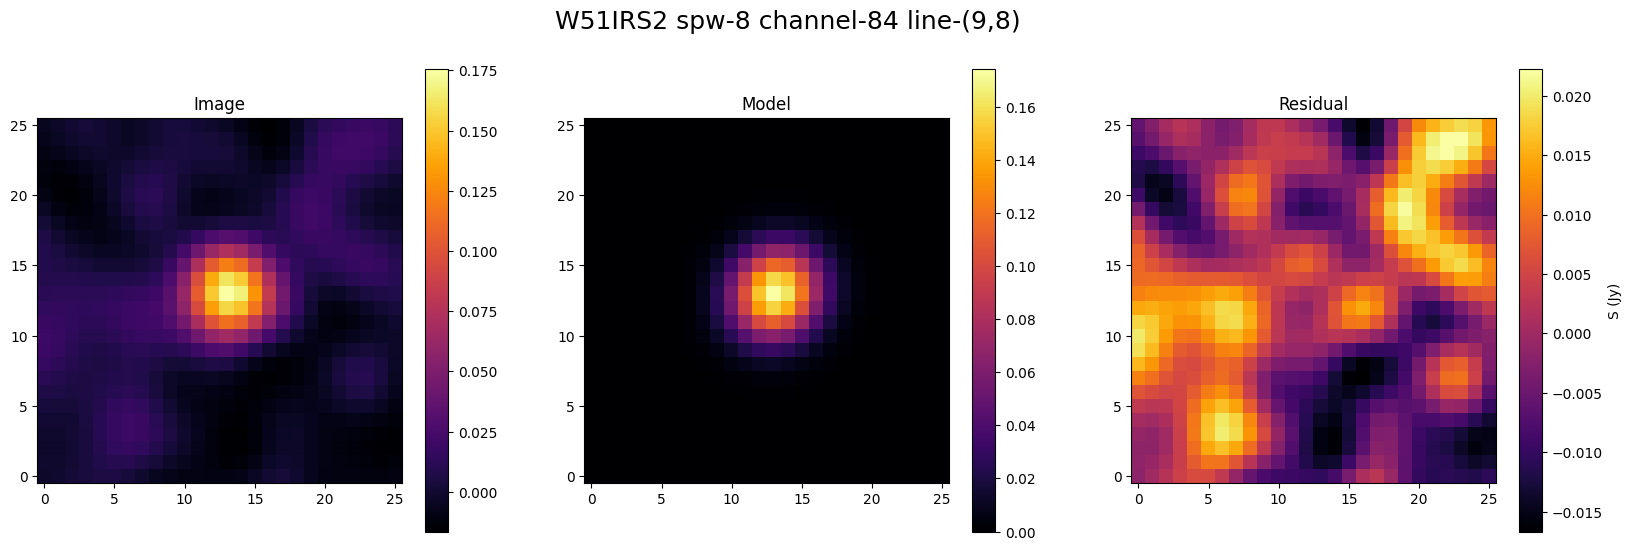

In [41]:
w51_irs2_maser_positions = fit_2dgaussian(table=True, directory='W51North_spw_8_corrected21_aug_02_ICRS.fits', 
                                          maser_table=w51_irs2_maser_positions, spw=8, channel=84, 
                                          amplitude=1.75e-1, x=637, y=358, x_stddev=0.03, y_stddev=0.024, theta=4*np.pi/3, 
                                          size=13, line='(9,8)')

In [26]:
w51_irs2_maser_positions

,line,spw,channel,x_pix,y_pix,amplitude,amplitude_error,x_mean,x_mean_error,y_mean,y_mean_error
0,"(7,6)",6,50,144,215,2.35845739e-01,2.535924575e-02,2.90917076e+02,8.806292325e-07,1.45182317e+01,8.653174454e-07
1,"(7,6)",6,50,144,215,2.35845739e-01,2.535924575e-02,2.90917076e+02,8.806292325e-07,1.45182317e+01,8.653174454e-07


In [12]:
w51_irs2_maser_positions.to_csv('/Users/galagabits/Developer/masers/W51/W51-Masers-and-Starforming-Regions/notebooks/w51_irs2_ammonia_maser_positions.csv', index=False)

OSError: Cannot save file into a non-existent directory: '/Users/galagabits/Developer/masers/W51/W51-Masers-and-Starforming-Regions/notebooks'